#Topik: **Worker Welfare in Indonesia**
https://www.kaggle.com/datasets/rezkyyayang/pekerja-sejahtera


# Note:
<li> Tahun = <b>Year</b>
<li> Provinsi = <b>Province</b>
<li> GK (Garis Kemiskinan) = <b>Poverty Line</b>
<li> Upah = <b>Wages</b>
<li> Jenis = <b>Type</b>
<li> Pengeluaran = <b>Expenditure</b>
<li> UMP (Upah Minimum Provinsi) = <b>PMW (Provincial Minimum Wage)</b>

## **Import Data and Modules**

In [129]:
#Import dataset
!git clone https://github.com/Leons21/Tingkat-Kesejahteraan-Pekerja-di-Indonesia/tree/main/Dataset

fatal: destination path 'Analysis-of-Indonesian-Workers-Welfare' already exists and is not an empty directory.


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import shapiro
from scipy.stats import kstest
import seaborn as sns
import warnings

gk = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/gk.df.csv').query("tahun >= 2015").groupby(['provinsi', 'tahun'])['gk'].mean().round(0).reset_index()
gkf = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/gk.df.csv').query("tahun >= 2015").groupby(['provinsi', 'jenis', 'daerah', 'periode', 'tahun'])['gk'].mean().round(0).reset_index()
upah = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/upah.df.csv').query("tahun >= 2015").groupby(['provinsi', 'tahun'])['upah'].mean().round(0).reset_index()
pengeluaran = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/peng.df.csv').query("tahun >= 2015").groupby(['provinsi', 'tahun'])['peng'].mean().round(0).reset_index()
pengeluaranf = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/peng.df.csv').query("tahun >= 2015").groupby(['provinsi', 'jenis', 'tahun'])['peng'].mean().round(0).reset_index()
ump = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/ump.df.csv').query("tahun >= 2015").groupby(['provinsi', 'tahun'])['ump'].mean().round(0).reset_index()


## Data Preparation

### Displays the contents of the imported file and visualizations

    provinsi  jenis     daerah    periode tahun        gk
143     ACEH  TOTAL  PERKOTAAN  SEPTEMBER  2022 646232.00
        tahun        gk
count  280.00    280.00
mean  2018.50 304529.30
std      2.30  73456.58
min   2015.00 171250.00
25%   2016.75 250135.75
50%   2018.50 291967.50
75%   2020.25 346183.00
max   2022.00 552163.00


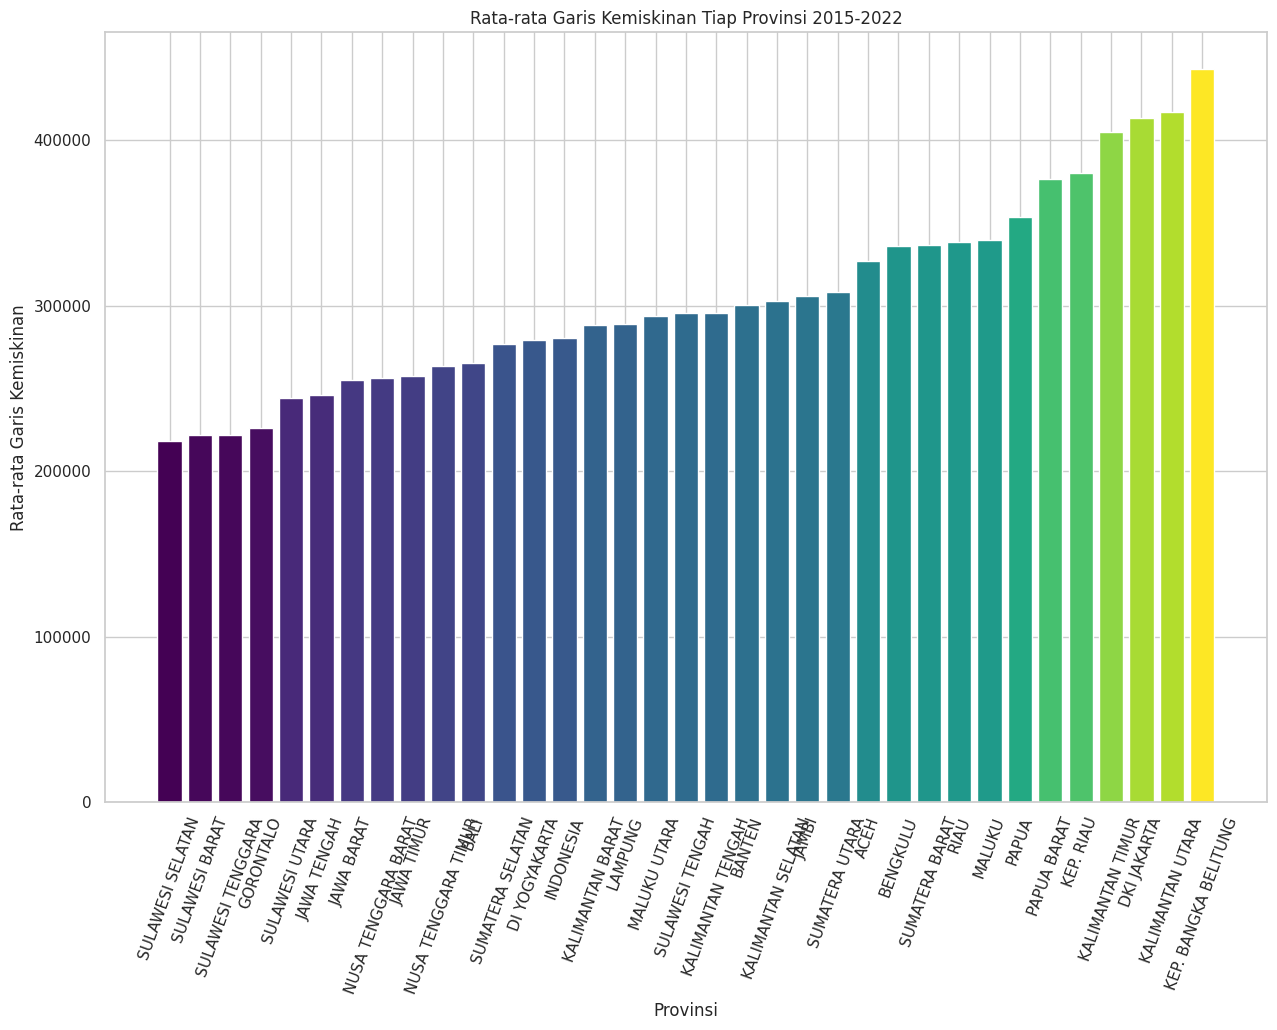

In [ ]:
# Poverty Line Data
pd.options.display.float_format = '{:.2f}'.format
print(gkf.iloc[143].to_frame().T)
print(gk.describe())

# Group the data Poverty Line by province, take the average, and sort.
grouped_df = gk.groupby('provinsi')['gk'].mean()
average_gk_df = grouped_df.reset_index()
average_gk_df = average_gk_df.sort_values(by='gk', ascending=True)

# Plotting data
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(average_gk_df['gk'].min(), average_gk_df['gk'].max())
colors = [cmap(norm(val)) for val in average_gk_df['gk']]

# Output Cluster
plt.figure(figsize=(15, 10))
plt.bar(average_gk_df['provinsi'], average_gk_df['gk'], color=colors)
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata Garis Kemiskinan') #Average Poverty Line
plt.title('Rata-rata Garis Kemiskinan Tiap Provinsi 2015-2022') #Average Poverty Line for Each Province 2015-2022
plt.xticks(rotation=70)
plt.show()

           provinsi  tahun     upah
0              ACEH   2015 11226.00
1              ACEH   2016 13627.00
2              ACEH   2017 14809.00
3              ACEH   2018 13814.00
4              ACEH   2019 15065.00
..              ...    ...      ...
275  SUMATERA UTARA   2018 13257.00
276  SUMATERA UTARA   2019 14061.00
277  SUMATERA UTARA   2020 15949.00
278  SUMATERA UTARA   2021 15486.00
279  SUMATERA UTARA   2022 15131.00

[280 rows x 3 columns]
        tahun     upah
count  280.00   280.00
mean  2018.50 16621.01
std      2.30  4371.80
min   2015.00  8525.00
25%   2016.75 13468.75
50%   2018.50 15845.00
75%   2020.25 18634.75
max   2022.00 32685.00


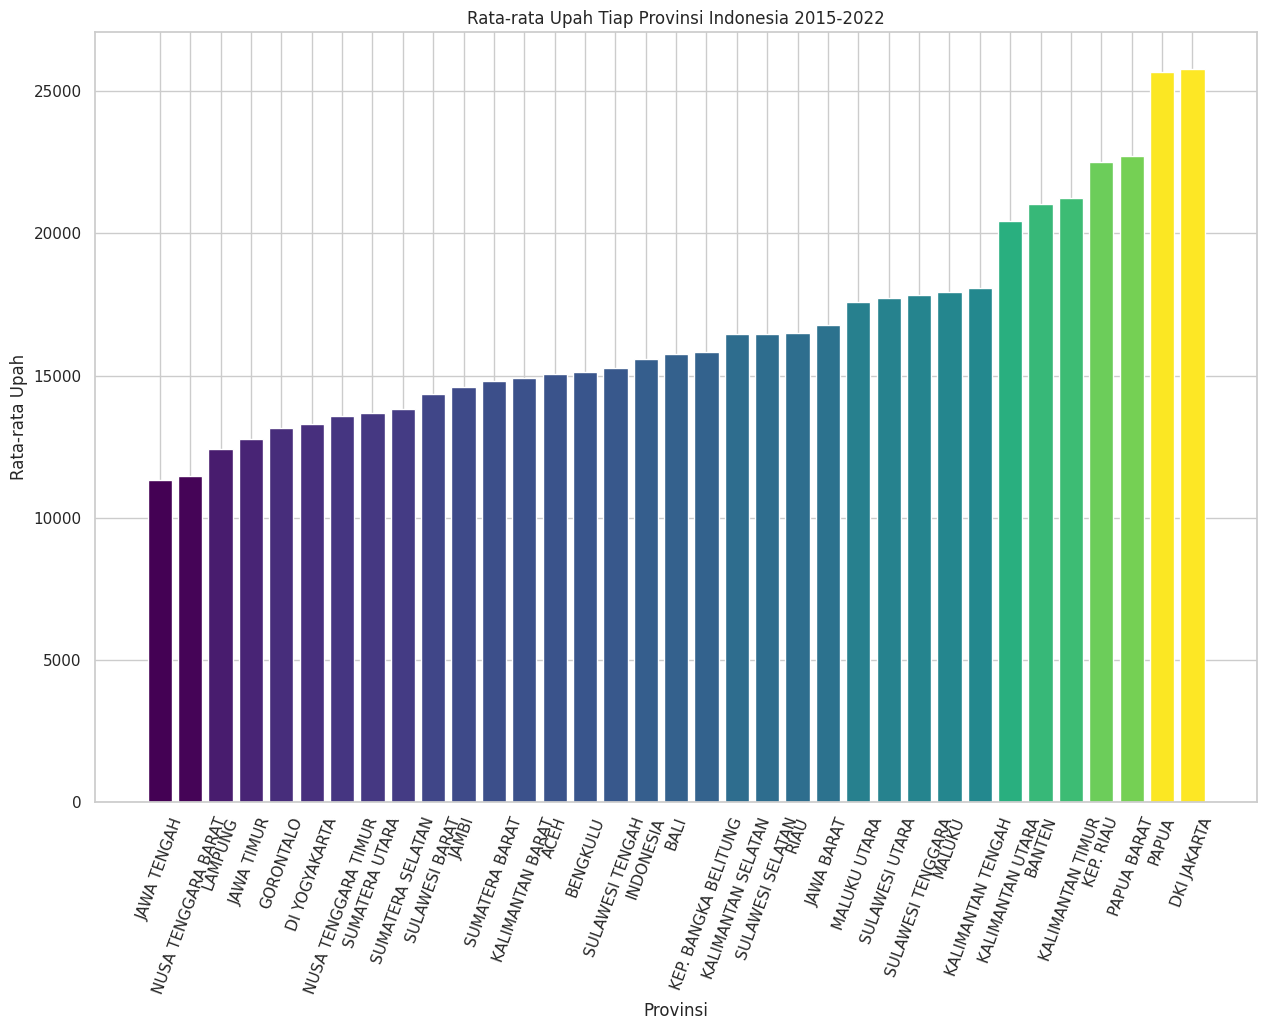

In [ ]:
# WAGES DATA

print(upah)
print(upah.describe())

# Group wage data according to province, take the average, and sort it.
grouped_df = upah.groupby('provinsi')['upah'].mean()
average_upah_df = grouped_df.reset_index()
average_upah_df = average_upah_df.sort_values(by='upah', ascending=True)

# Plotting data
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(average_upah_df['upah'].min(), average_upah_df['upah'].max())
colors = [cmap(norm(val)) for val in average_upah_df['upah']]

# Output Cluster
plt.figure(figsize=(15, 10))
plt.bar(average_upah_df['provinsi'], average_upah_df['upah'], color=colors)
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata Upah') #Average Wage
plt.title('Rata-rata Upah Tiap Provinsi Indonesia 2015-2022') #Average Wage for Each Province Indonesia 2015-2022
plt.xticks(rotation=70)
plt.show()

           provinsi  tahun      peng
0              ACEH   2015 534164.00
1              ACEH   2016 578115.00
2              ACEH   2017 638003.00
3              ACEH   2018 685115.00
4              ACEH   2019 695317.00
..              ...    ...       ...
275  SUMATERA UTARA   2018 664341.00
276  SUMATERA UTARA   2019 703613.00
277  SUMATERA UTARA   2020 742787.00
278  SUMATERA UTARA   2021 753999.00
279  SUMATERA UTARA   2022 802326.00

[280 rows x 3 columns]
        tahun       peng
count  280.00     280.00
mean  2018.50  765854.14
std      2.30  184591.38
min   2015.00  412598.00
25%   2016.75  643836.25
50%   2018.50  744516.00
75%   2020.25  851985.75
max   2022.00 1683564.00


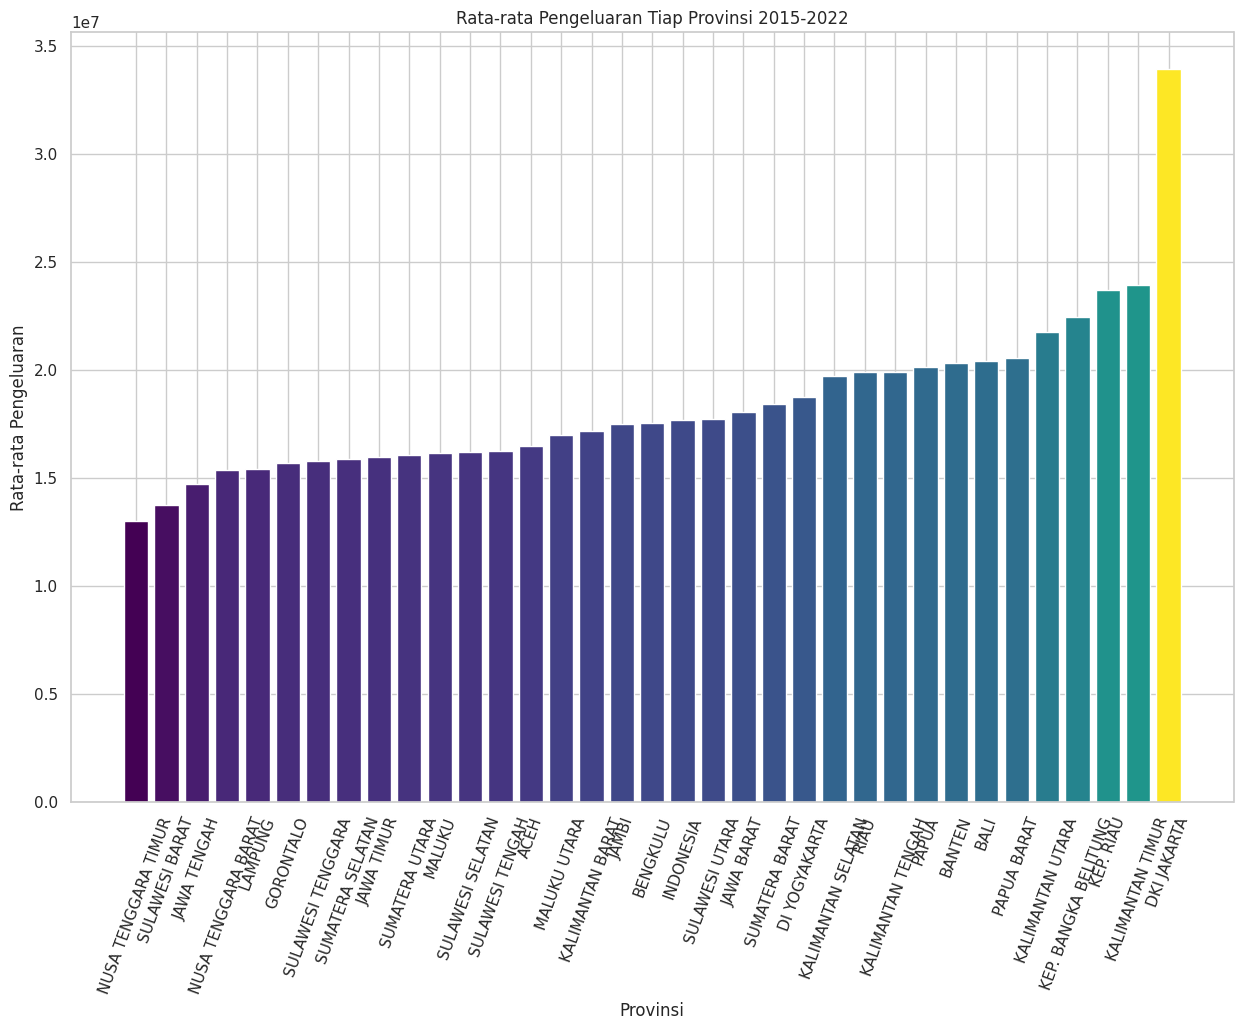

In [ ]:
# EXPENDITURE DATA

print(pengeluaran)
print(pengeluaran.describe())

# Group expenditure data according to province, take the average, and sort it.
grouped_df = pengeluaranf.groupby('provinsi')['peng'].sum()
average_pengeluaran_df = grouped_df.reset_index()
average_pengeluaran_df = average_pengeluaran_df.sort_values(by='peng', ascending=True)

# Plotting data
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(average_pengeluaran_df['peng'].min(), average_pengeluaran_df['peng'].max())
colors = [cmap(norm(val)) for val in average_pengeluaran_df['peng']]

# Output Plotting
plt.figure(figsize=(15, 10))
plt.bar(average_pengeluaran_df['provinsi'], average_pengeluaran_df['peng'], color=colors)
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata Pengeluaran') #Average Expenditure
plt.title('Rata-rata Pengeluaran Tiap Provinsi 2015-2022') #Average Expenditure for Each Province 2015-2022
plt.xticks(rotation=70)
plt.show()

           provinsi  tahun        ump
0              ACEH   2015 1900000.00
1              ACEH   2016 2118500.00
2              ACEH   2017 2500000.00
3              ACEH   2018 2700000.00
4              ACEH   2019 2916810.00
..              ...    ...        ...
275  SUMATERA UTARA   2018 2132189.00
276  SUMATERA UTARA   2019 2303403.00
277  SUMATERA UTARA   2020 2499423.00
278  SUMATERA UTARA   2021 2499423.00
279  SUMATERA UTARA   2022 2522610.00

[280 rows x 3 columns]
        tahun        ump
count  280.00     280.00
mean  2018.50 2311369.17
std      2.30  603153.12
min   2015.00  910000.00
25%   2016.75 1877250.00
50%   2018.50 2268432.00
75%   2020.25 2688292.50
max   2022.00 4641854.00


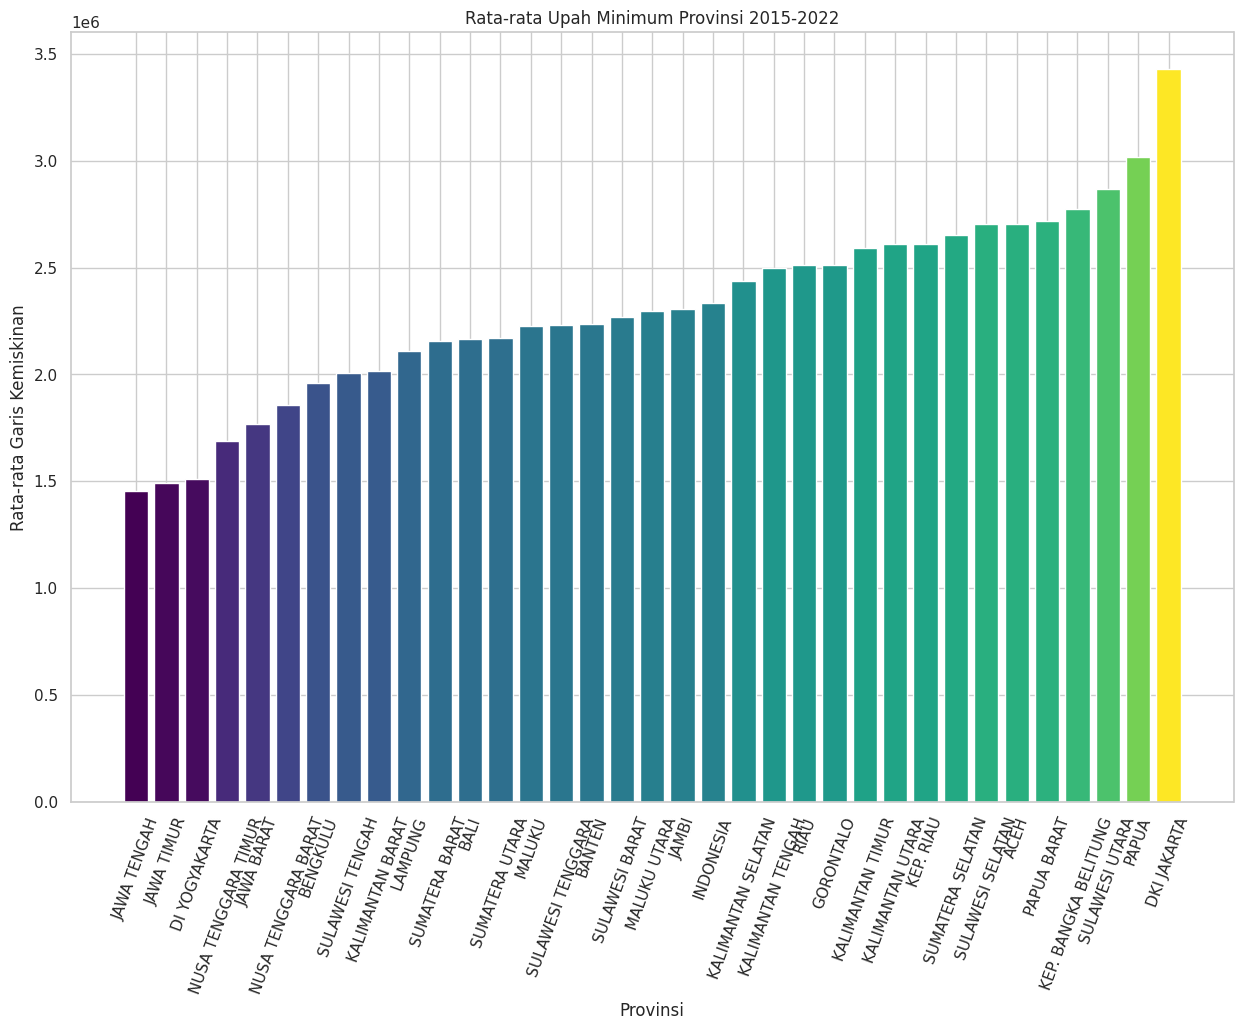

In [ ]:
# PMW DATA

print(ump)
print(ump.describe())

# Group PMW data according to province, take the average, and sort it.
grouped_df = ump.groupby('provinsi')['ump'].mean()
average_ump_df = grouped_df.reset_index()
average_ump_df = average_ump_df.sort_values(by='ump', ascending=True)

# Plotting data
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(average_ump_df['ump'].min(), average_ump_df['ump'].max())
colors = [cmap(norm(val)) for val in average_ump_df['ump']]

# Output plotting
plt.figure(figsize=(15, 10))
plt.bar(average_ump_df['provinsi'], average_ump_df['ump'], color=colors)
plt.xlabel('Provinsi')
plt.ylabel('Rata-rata Garis Kemiskinan') #Average Poverty Line
plt.title('Rata-rata Upah Minimum Provinsi 2015-2022') #Average Minimum Wage for Each Province 2015-2022
plt.xticks(rotation=70)
plt.show()

### Check for missing values ​​or values ​​that do not match



In [ ]:
# Check missing value
missing_values = gkf.isnull().sum()
print("Missing Values:\n", missing_values)

# Check different data types in Poverty Line Data
unique_dtypes = gkf.applymap(type).nunique()
print("\n\nData types in GK:\n", unique_dtypes)
assert (unique_dtypes == 1).all(), "Not all columns have the same data type"

Missing Values:
 provinsi     0
jenis        0
daerah       0
periode      0
tahun        0
gk          48
dtype: int64


Data types in GK:
 provinsi    1
jenis       1
daerah      1
periode     1
tahun       1
gk          1
dtype: int64


In [ ]:
# check missing value
missing_values = upah.isnull().sum()
print("Missing Values:\n", missing_values)

# Check different data types in Wage Data
unique_dtypes = upah.applymap(type).nunique()
print("\n\nData types in upah:\n", unique_dtypes)
assert (unique_dtypes == 1).all(), "Not all columns have the same data type"

Missing Values:
 provinsi    0
tahun       0
upah        0
dtype: int64


Data types in upah:
 provinsi    1
tahun       1
upah        1
dtype: int64


In [ ]:
# check missing value
missing_values = pengeluaran.isnull().sum()
print("Missing Values:\n", missing_values)

# Check different data types in Expenditure Data
unique_dtypes = pengeluaran.applymap(type).nunique()
print("\n\nData types in pengeluaran:\n", unique_dtypes)
assert (unique_dtypes == 1).all(), "Not all columns have the same data type"

Missing Values:
 provinsi    0
tahun       0
peng        0
dtype: int64


Data types in pengeluaran:
 provinsi    1
tahun       1
peng        1
dtype: int64


In [ ]:
# check missing value
missing_values = ump.isnull().sum()
print("Missing Values:\n", missing_values)

# Check different data types in PMW Data
unique_dtypes = ump.applymap(type).nunique()
print("\n\nData types in ump:\n", unique_dtypes)
assert (unique_dtypes == 1).all(), "Not all columns have the same data type"

Missing Values:
 provinsi    0
tahun       0
ump         0
dtype: int64


Data types in ump:
 provinsi    1
tahun       1
ump         1
dtype: int64


In [ ]:
# Clean all data
gk2 = gk.drop(columns=['provinsi', 'tahun'])
ump2 = ump.drop(columns=['provinsi', 'tahun'])
pengeluaran2 = pengeluaran.drop(columns=['provinsi', 'tahun'])
upah2 = upah.drop(columns=['provinsi', 'tahun'])

# Concat all data
result = pd.concat([gk, ump2, pengeluaran2, upah2], axis=1, join='outer').reset_index()

result.head()

,index,provinsi,tahun,gk,ump,peng,upah
0,0,ACEH,2015,266577.00,1900000.00,534164.00,11226.00
1,1,ACEH,2016,280999.00,2118500.00,578115.00,13627.00
2,2,ACEH,2017,299562.00,2500000.00,638003.00,14809.00
3,3,ACEH,2018,316262.00,2700000.00,685115.00,13814.00
4,4,ACEH,2019,332006.00,2916810.00,695317.00,15065.00


## Regression Method

Objektif: Predict hourly wage figures for each province
Data: upah.df.csv, ump.df.csv

Algoritma Learning: Linear Regression denganPolynomial Features


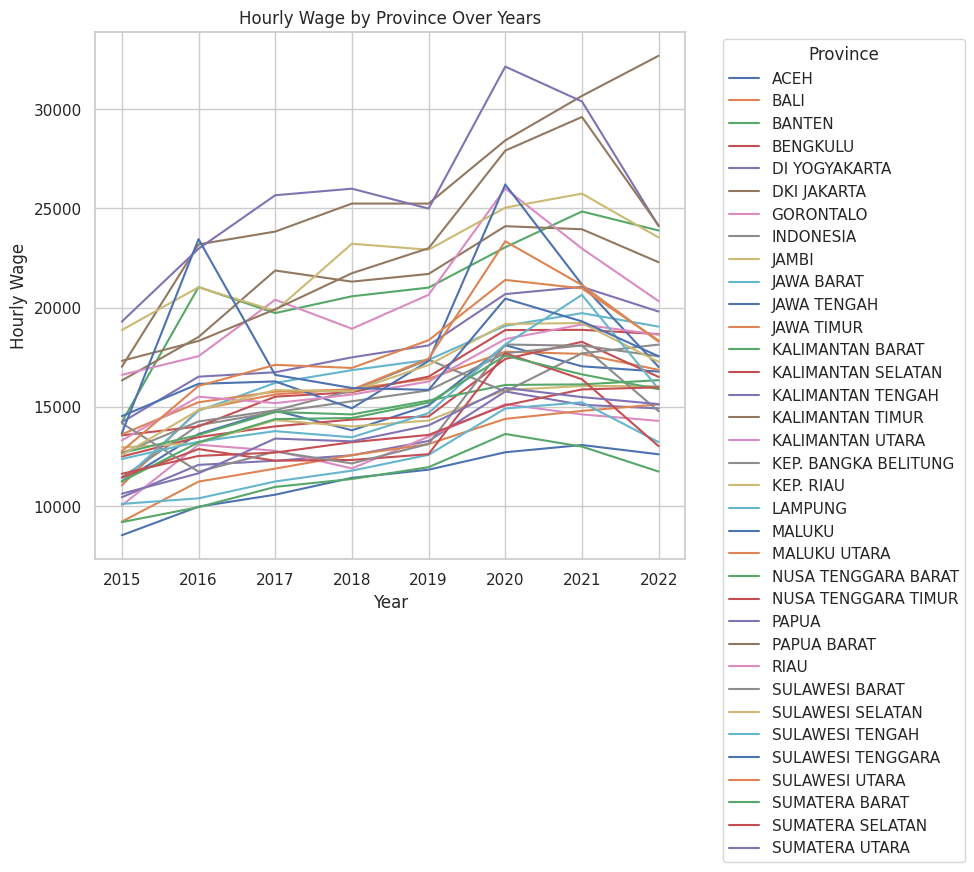

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Plotting hourly wage by province over the years
for provinsi, group in result.groupby('provinsi'):
    sns.lineplot(data=group, x='tahun', y='upah', label=provinsi)

plt.title('Hourly Wage by Province Over Years')
plt.xlabel('Year')
plt.ylabel('Hourly Wage')
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
import joblib

# Change data types years to integer
upah['tahun'] = upah['tahun'].astype(int)

predictions = []
models = {}

# Grouping the data by province
grouped = upah.groupby('provinsi')

# Making models for each province
for provinsi, group in grouped:
    X = group[['tahun']]
    y = group['upah']

    # Make and train the model
    model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=0.1))
    model.fit(X, y)
    models[provinsi] = model

    # Make predictions for the next 7 years
    future_years = pd.DataFrame({'tahun': range(2022, 2029)})  # Start prediction from 2023
    future_years['provinsi'] = provinsi
    future_years['predicted_upah'] = model.predict(future_years[['tahun']])

    predictions.append(future_years)

predictions_df = pd.concat(predictions, ignore_index=True)

# Merge predictions with the original wages DataFrame
merged_df = pd.merge(upah, predictions_df, on=['provinsi', 'tahun'], how='left')

# Fill in the actual wages for 2022
actual_upah_2022 = upah.loc[upah['tahun'] == 2022, ['provinsi', 'upah']]
predictions_df.loc[predictions_df['tahun'] == 2022, 'predicted_upah'] = actual_upah_2022['upah'].values


print(predictions_df)
print(predictions_df.loc[predictions_df['tahun'] == 2028].sort_values(by='predicted_upah'))

     tahun        provinsi  predicted_upah
0     2022            ACEH        16772.00
1     2023            ACEH        18647.41
2     2024            ACEH        19446.72
3     2025            ACEH        20246.41
4     2026            ACEH        21046.47
..     ...             ...             ...
240   2024  SUMATERA UTARA        17576.27
241   2025  SUMATERA UTARA        18283.54
242   2026  SUMATERA UTARA        18991.14
243   2027  SUMATERA UTARA        19699.07
244   2028  SUMATERA UTARA        20407.33

[245 rows x 3 columns]
     tahun              provinsi  predicted_upah
160   2028   NUSA TENGGARA BARAT        16191.25
76    2028           JAWA TENGAH        17105.02
48    2028             GORONTALO        18384.95
167   2028   NUSA TENGGARA TIMUR        18692.92
139   2028               LAMPUNG        18981.64
62    2028                 JAMBI        19212.98
90    2028      KALIMANTAN BARAT        19827.46
34    2028         DI YOGYAKARTA        19835.55
216   2028     SULA

<ipython-input-142-2f54e942f7c8>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


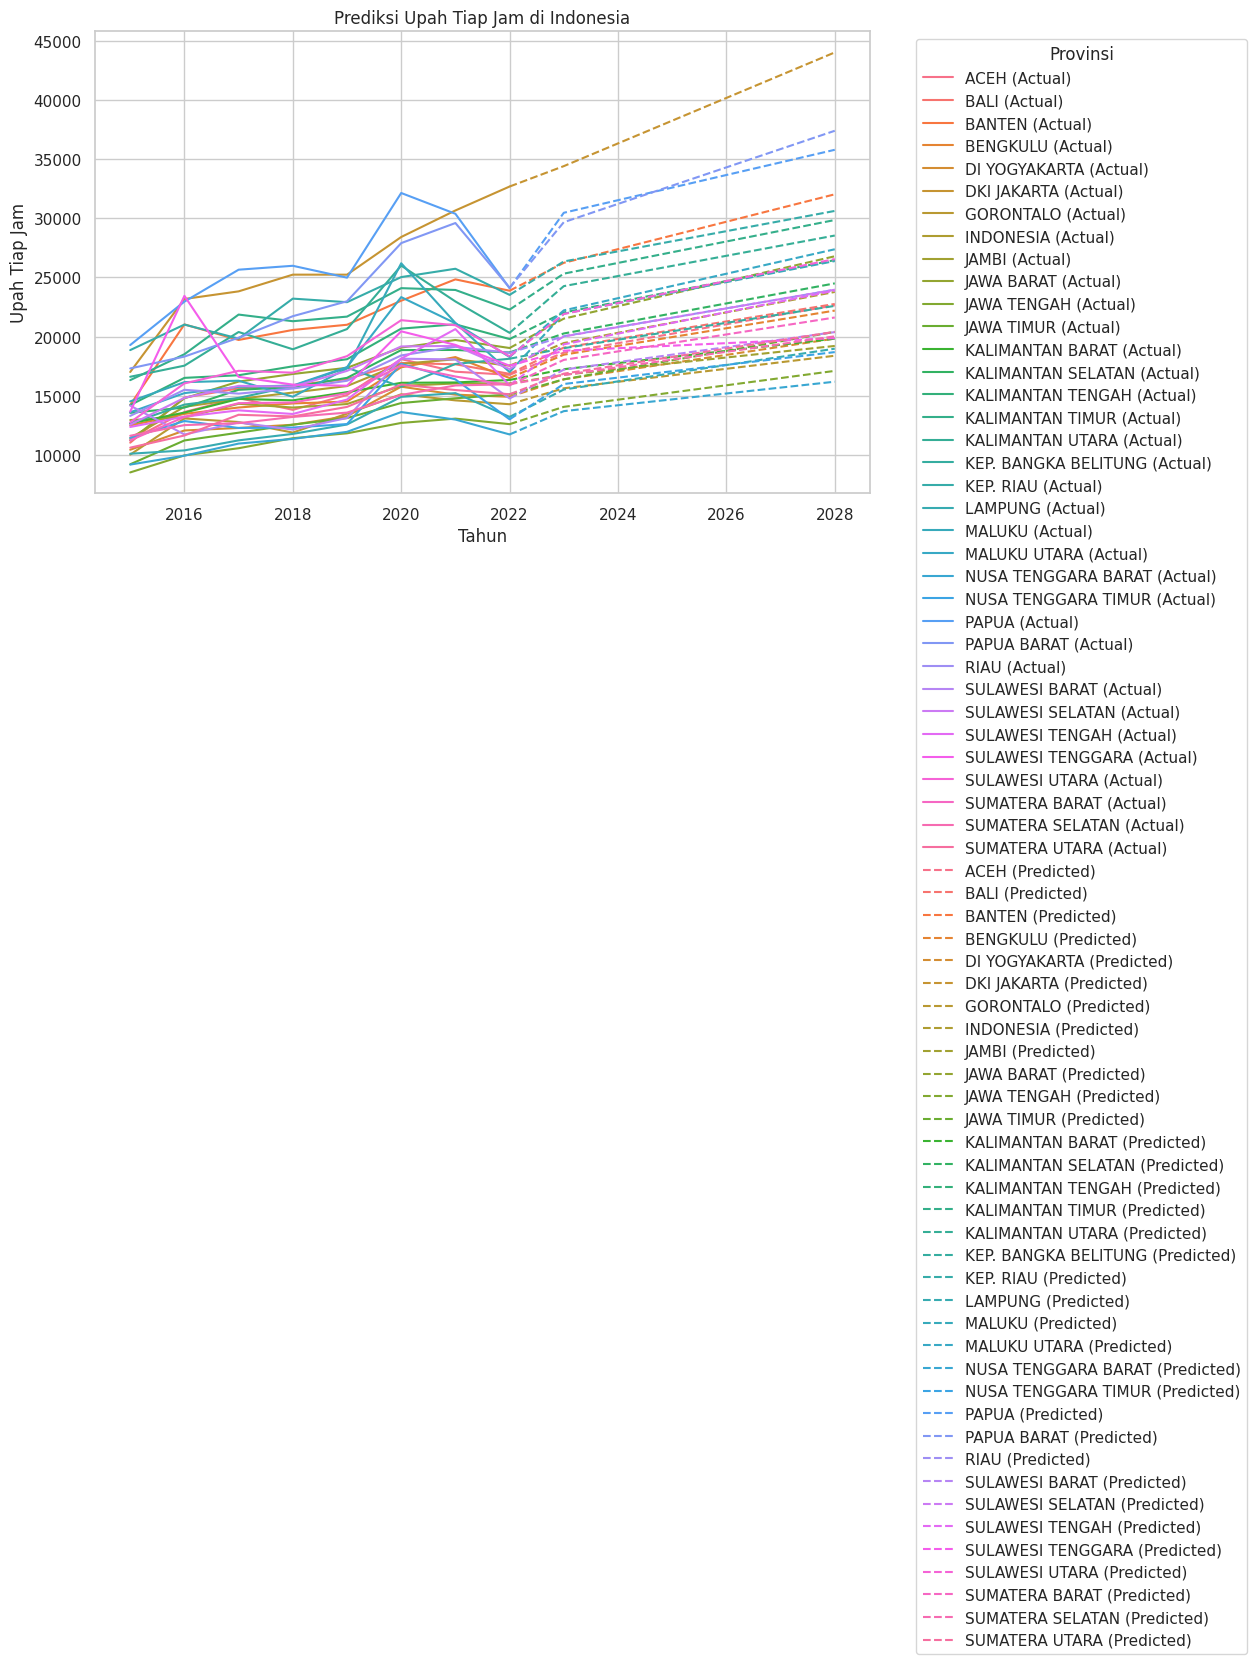

In [ ]:
# Combining predicted results with known wages
merged_df = pd.merge(upah, predictions_df, on=['provinsi', 'tahun'], how='left')

# Prepare plotting
palette = sns.color_palette("husl", len(upah['provinsi'].unique()))
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plotting known wages figures for each province
for i, (provinsi, group) in enumerate(upah.groupby('provinsi')):
    sns.lineplot(data=group, x='tahun', y='upah', label=f'{provinsi} (Actual)', color=palette[i])

# Plotting predicted wage figures for each province
for i, (provinsi, group) in enumerate(predictions_df.groupby('provinsi')):
    sns.lineplot(data=group, x='tahun', y='predicted_upah', label=f'{provinsi} (Predicted)', linestyle='dashed', color=palette[i])

plt.title('Prediksi Upah Tiap Jam di Indonesia') #Hourly Wage Prediction in Indonesia
plt.xlabel('Tahun')
plt.ylabel('Upah Tiap Jam') #Hourly Wages
plt.legend(title='Provinsi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

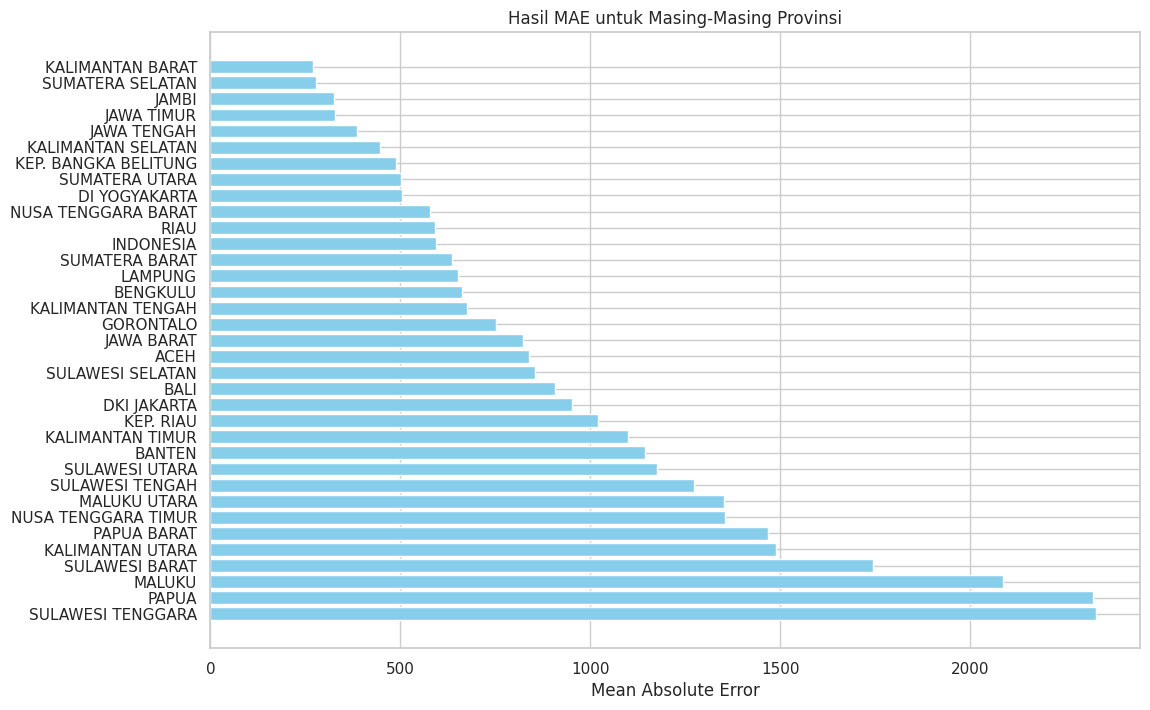

In [ ]:
# Calculating MAE for each province
mae_results = {}
for provinsi, model in models.items():
    group = upah[upah['provinsi'] == provinsi]
    X = group[['tahun']]
    y_true = group['upah']
    y_pred = model.predict(X)
    mae_results[provinsi] = mean_absolute_error(y_true, y_pred)

# Sorting MAE
sorted_mae_results = sorted(mae_results.items(), key=lambda x: x[1])

# Output  MAE
# for provinsi, mae in sorted_mae_results:
#     print(f"MAE for {provinsi}: {mae}")

# Plotting MAE results for each province
provinces = [provinsi for provinsi, mae in sorted_mae_results]
mae_values = [mae for provinsi, mae in sorted_mae_results]

plt.figure(figsize=(12, 8))
plt.barh(provinces, mae_values, color='skyblue')
plt.xlabel('Mean Absolute Error')
plt.title('Hasil MAE untuk Masing-Masing Provinsi') #MAE Results for Each Province
plt.gca().invert_yaxis()  # Invert y-axis to display provinces from top to bottom
plt.show()

## Clustering Method

Objektif: Grouping of regions according to similarities in wages and expenditure
Data: upah.df.csv, gk.df.csv, peng.df.csv, ump.df.csv
Algoritma Learning: KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-144-819a1212e09f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_c_2022['cluster'] = labels


[2 0 0 3 3 1 0 0 0 3 3 3 0 2 2 2 2 2 2 0 0 0 3 3 2 2 2 0 2 0 0 2 0 2 0]


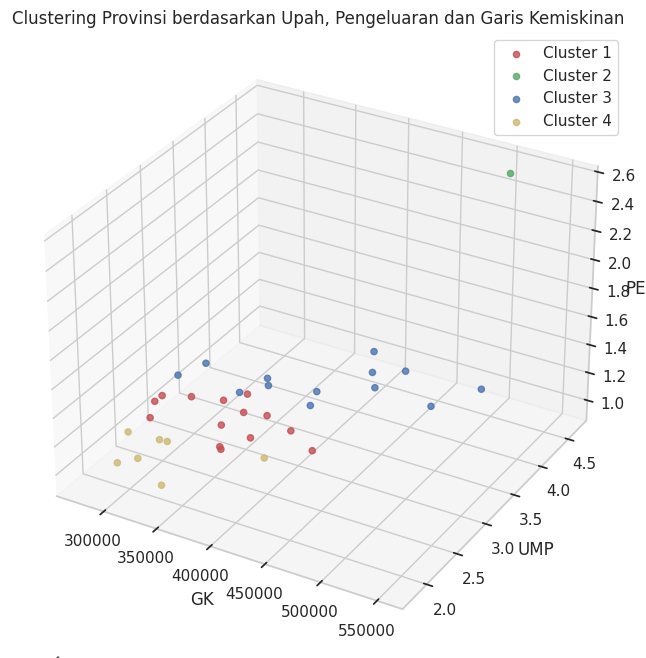

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

gk1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/gk.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['gk'].mean().round(0)
upah1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/upah.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['upah'].mean().round(0)
pengeluaran1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/peng.df.csv').query("tahun >= 2015").query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['peng'].mean().round(0)
ump1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/ump.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['ump'].mean().round(0)

result_c = pd.concat([gk1, ump1, pengeluaran1, upah1], axis=1, join='outer').reset_index()
result_c = result_c.reset_index()

result_c_2022 = result_c[result_c['tahun'] == 2022]
data_2022 = result_c_2022[['gk', 'ump', 'peng', 'upah']].values

# Initialize the training model
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_2022)

labels = kmeans.labels_

print(labels)

result_c_2022['cluster'] = labels

# Plot of the results of KMeans clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i in range(num_clusters):
    cluster_data = result_c_2022[result_c_2022['cluster'] == i]
    ax.scatter(cluster_data['gk'], cluster_data['ump'], cluster_data['peng'], c=colors[i], label=f'Cluster {i+1}', alpha=0.8)

ax.set_xlabel('GK')
ax.set_ylabel('UMP')
ax.set_zlabel('PENG')
ax.set_title('Clustering Provinsi berdasarkan Upah, Pengeluaran dan Garis Kemiskinan') #Provincial Clustering Based on Wages, Expenditures and Poverty Line
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

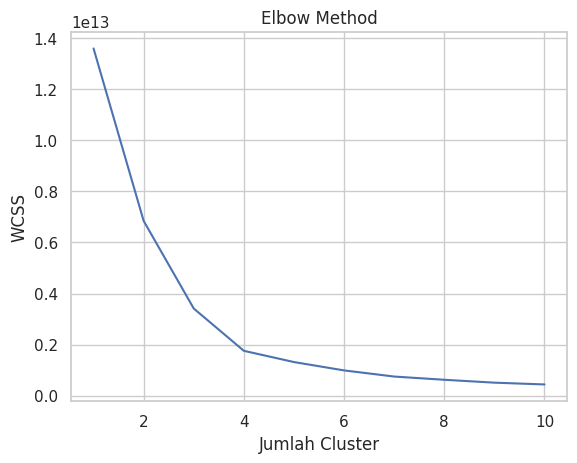

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

gk1 = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/gk.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['gk'].mean().round(0)
upah1 = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/upah.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['upah'].mean().round(0)
pengeluaran1 = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/peng.df.csv').query("tahun >= 2015").query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['peng'].mean().round(0)
ump1 = pd.read_csv('/content/Analysis-of-Indonesian-Workers-Welfare/Dataset/ump.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['ump'].mean().round(0)

result_c = pd.concat([gk1, ump1, pengeluaran1, upah1], axis=1, join='outer').reset_index()
result_c = result_c.reset_index()

result_c_2022 = result_c[result_c['tahun'] == 2022]
data_2022 = result_c_2022[['gk', 'ump', 'peng', 'upah']].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(data_2022)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster') #Number of Clusters
plt.ylabel('WCSS')
plt.show()

In [146]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(data_2022, labels)
print(f'Silhouette Score: {silhouette_score_value}')

# Calculate calinski-harabasz index
calinski_harabasz_score_value = calinski_harabasz_score(data_2022, labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz_score_value}')

# Calculate davies-bouldin index
davies_bouldin_score_value = davies_bouldin_score(data_2022, labels)
print(f'Davies-Bouldin Score: {davies_bouldin_score_value}')

Silhouette Score: 0.44877391582231524
Calinski-Harabasz Score: 69.77997705811501
Davies-Bouldin Score: 0.571082550671532


[0 1 1 3 3 2 1 1 1 3 3 3 1 0 0 0 0 0 0 1 1 1 3 3 0 0 0 1 0 1 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-147-0d50f9881645>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_c_2022['cluster'] = labels


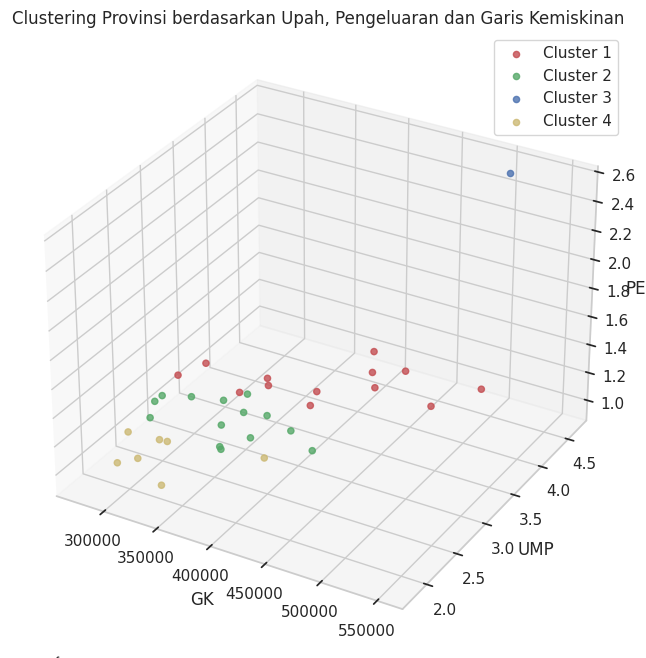

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

gk1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/gk.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['gk'].mean().round(0)
upah1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/upah.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['upah'].mean().round(0)
pengeluaran1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/peng.df.csv').query("tahun >= 2015").query("jenis == 'TOTAL'").groupby(['tahun', 'provinsi'])['peng'].mean().round(0)
ump1 = pd.read_csv('Analysis-of-Indonesian-Workers-Welfare/Dataset/ump.df.csv').query("tahun >= 2015").groupby(['tahun', 'provinsi'])['ump'].mean().round(0)

result_c = pd.concat([gk1, ump1, pengeluaran1, upah1], axis=1, join='outer').reset_index()
result_c = result_c.reset_index()

result_c_2022 = result_c[result_c['tahun'] == 2022]
data_2022 = result_c_2022[['gk', 'ump', 'peng', 'upah']].values

num_clusters = 4

# Initialize the training model
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_2022)

labels = kmeans.labels_

print(labels)

result_c_2022['cluster'] = labels

# Plot of the results of KMeans clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']
for i in range(num_clusters):
    cluster_data = result_c_2022[result_c_2022['cluster'] == i]
    ax.scatter(cluster_data['gk'], cluster_data['ump'], cluster_data['peng'], c=colors[i], label=f'Cluster {i+1}', alpha=0.8)

ax.set_xlabel('GK') #PL
ax.set_ylabel('UMP') #PMW
ax.set_zlabel('PENG') #Expenditure
ax.set_title('Clustering Provinsi berdasarkan Upah, Pengeluaran dan Garis Kemiskinan') #Provincial Clustering Based on Wages, Expenditures and Poverty Line
plt.legend()
plt.show()
